# Logistic Regression with Simple Kernels

In this tutorial, we explain how to use our feature maps with logistic regression on binary and multi-class classification problems. We start with importing the standart libraries and our feature maps.

In [1]:
import numpy as np
from numpy import linalg
import FeatureMaps as maps
import DataReader as DR
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

Here, we use Splice binary classification dataset and apply standard scaling.

In [2]:
#suppress the convergence warning for LogisticRegression
import warnings
warnings.filterwarnings("ignore")

X_train, X_test, y_train, y_test = DR.Splice()
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In the following code block, we apply the logistic regression with  $\phi_{p,1}(\mathbf{x}~|~\mathbf{a})$ and print the test prediction score. 

In [3]:
clf= LogisticRegression(C=0.01, solver='lbfgs', penalty='l2', dual=False).fit(maps.phi_p_1(X_train, p=1), y_train)
print("Test Score: ",round(100 * accuracy_score(y_test, clf.predict(maps.phi_p_1(X_test, p=1))), 2))

Test Score:  85.56


Here, we also reproduce the results given in Figure 5 of our paper with the logistic regression. The implementations can be found in these modules.

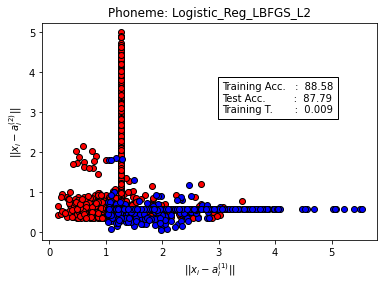

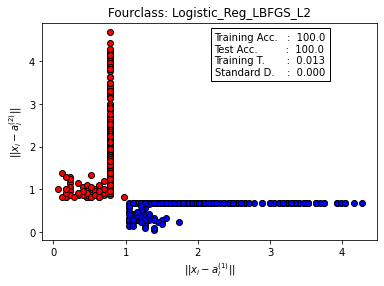

In [4]:
import Figure_5_Phoneme_LR
import Figure_5_FourClass_LR

`Scikit-learn` also allows to use multinomial loss for multi-class classification problems. Next, we use Digits dataset with feature map $\phi_{p,M}(\mathbf{x}_i~|~\mathbf{a}_i^{(1)}, \dots, \mathbf{a}_i^{(M)})$ by choosing the set of anchor points as the centers of the each class.

In [5]:
from sklearn.model_selection import train_test_split
from sklearn import datasets

digits = datasets.load_digits(n_class=10)
n_samples = len(digits.data)
data = digits.data / 16.
data -= data.mean(axis=0)

def map_min_M_1(X, anchorsets):
    X1=np.copy(X)
    for anchors in anchorsets:
        temp = []
        for a in anchors:
            temp.append(linalg.norm(X - a, axis=1, ord=1))
        temp = np.array(temp)
        X1 = np.hstack((X1, (np.min(temp, axis=0).reshape((len(X), 1)))))
    return X1

X_train,X_test,y_train,y_test=train_test_split(data, digits.target,test_size=0.3, random_state=42, stratify= digits.target, shuffle=True)
y_unique=np.unique(y_train)
anchor_set=[np.mean(X_train[y_train==i],axis=0) for i in y_unique]

In [6]:
clf= LogisticRegression(C=10, solver='newton-cg', penalty='l2', dual=False, multi_class='multinomial').fit(map_min_M_1(X_train,anchorsets=anchor_set), y_train)
print("Test Score: ",round(100 * accuracy_score(y_test, clf.predict(map_min_M_1(X_test,anchorsets=anchor_set))), 2))

Test Score:  97.41


In [7]:
clf= LogisticRegression(C=10, solver='newton-cg', penalty='l2', dual=False, multi_class='multinomial').fit(X_train, y_train)
print("Test Score: ",round(100 * accuracy_score(y_test, clf.predict(X_test)), 2))

Test Score:  96.48


We also reproduce the results of Table 2 and Table 3 in our paper but this time with logistic regression. 

In [8]:
import LR_Table_2_3_Run

***** Table 2: Test Accuracies

***Splice
LIN	85.66		$\phi_{1,1}$	86.3		$\phi_{2,1}$	86.16		$\phi_{1,d}$	91.45		$\phi_{2,d}$	89.52		

***Wilt
LIN	71.4		$\phi_{1,1}$	83.2		$\phi_{2,1}$	80.6		$\phi_{1,d}$	85.0		$\phi_{2,d}$	83.6		

***Guide 1
LIN	95.6		$\phi_{1,1}$	96.12		$\phi_{2,1}$	96.08		$\phi_{1,d}$	96.6		$\phi_{2,d}$	96.18		

***Spambase
LIN	92.69		$\phi_{1,1}$	92.25		$\phi_{2,1}$	93.34		$\phi_{1,d}$	95.0		$\phi_{2,d}$	93.12		

***Phoneme
LIN	73.3		$\phi_{1,1}$	73.37		$\phi_{2,1}$	73.49		$\phi_{1,d}$	77.74		$\phi_{2,d}$	77.19		

***Magic
LIN	79.51		$\phi_{1,1}$	81.02		$\phi_{2,1}$	80.46		$\phi_{1,d}$	85.37		$\phi_{2,d}$	85.05		

***Adult
LIN	84.99		$\phi_{1,1}$	84.98		$\phi_{2,1}$	85.04		$\phi_{1,d}$	84.99		$\phi_{2,d}$	84.96		
***** Table 3: Training Times in Seconds

***Splice
LIN	0.0033		$\phi_{1,1}$	0.025		$\phi_{2,1}$	0.0169		$\phi_{1,d}$	0.0122		$\phi_{2,d}$	0.0096		

***Wilt
LIN	0.0094		$\phi_{1,1}$	0.014		$\phi_{2,1}$	0.012		$\phi_{1,d}$	0.0272		$\phi_{2,d}$	0.0194		

***Gu